![](img/563_banner.png)

# Course Information

UBC Master of Data Science program, 2023-24

Instructor: Varada Kolhatkar

### Imports 

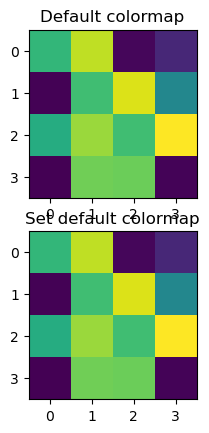

In [5]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("code/.")
from plotting_functions import *
from sklearn import datasets

In [6]:
import sklearn

sklearn.__version__


'1.4.0'

## Learning outcomes 

From this lecture, students are expected to be able to:

- Explain what is unsupervised learning. 
- Explain the difference between supervised and unsupervised learning. 
- Name some example applications of unsupervised learning. 


### Types of machine learning 

Recall the typical learning problems we discussed in 571. 

- Supervised learning ([Gmail spam filtering](https://support.google.com/a/answer/2368132?hl=en))
    - Training a model from input data and its corresponding targets to predict targets for new examples. (571, 572, 573)    
- **Unsupervised learning** (this course) ([Google News](https://news.google.com/))
    - Training a model to find patterns in a dataset, typically an unlabeled dataset.
- Reinforcement learning ([AlphaGo](https://deepmind.com/research/case-studies/alphago-the-story-so-far))
    - A family of algorithms for finding suitable actions to take in a given situation in order to maximize a reward. 
- **Recommendation systems** ([Amazon item recommendation system](https://www.cs.umd.edu/~samir/498/Amazon-Recommendations.pdf))
    - Predict the "rating" or "preference" a user would give to an item.    

### Supervised learning

- Training data comprises a set of observations ($X$) and their corresponding targets ($y$). 
- We wish to find a model function $f$ that relates $X$ to $y$.
- Then use that model function to predict the targets of new examples.
- We have been working with this set up so far. 

![](img/sup-learning.png)

<!-- <img src="img/sup-learning.png" height="1000" width="1000">  -->

### Unsupervised learning

- Training data consists of observations ($X$) without any corresponding targets.
- Unsupervised learning could be used to group similar things together in $X$ or to find underlying structure in the data. 

![](img/unsup-learning.png)

<!-- <img src="img/unsup-learning.png" alt="" height="900" width="900">  -->

### Can we learn without targets?

- Yes, but the learning will be focused on finding the underlying structures of the inputs themselves (rather than finding the function $f$ between input and output like we did in supervised learning models). 

- Examples:
    - Clustering
    - Dimensionality reduction

### Labeled vs. Unlabeled data
- If you have access to labeled training data, you're in the "supervised" setting. 
- You know what to do in that case from 571, 572, 573.  
- Unfortunately, getting large amount of labeled training data is often time consuming and expensive.
- Annotated data can become "stale" after a while in cases such as fraud detection. 
- Can you still make sense of the data even though you do not have the labels? 
- Yes! At least to a certain extent! 

### Example: Supervised vs unsupervised learning

- In supervised learning, we are given features $X$ and target $y$. 


<table>
<tr style="background-color:white;">
    <td>
        <table>
            <tr>
                <td colspan="2" style="text-align:center;"> <b>Dataset 1</b> </td>
                <td></td>
            </tr>
            <tr>
                <td>$x_1$</td>
                <td>$y$</td>
            </tr>
            <tr>
                <td> 101.0
                <td> Sick
            </tr>
            <tr>
                <td> 98.5 
                <td> Not Sick
            </tr>
            <tr>
                <td> 93.8 
                <td> Sick
            </tr>
            <tr>
                <td> 104.3
                <td> Sick
            </tr>
            <tr>
                <td> 98.6 
                <td> Not Sick
            </tr>
        </table>
    </td>
    <td>
       <table>
            <tr>
                <td colspan="3" style="text-align:center;"> <b>Dataset2</b> </td>
                <td></td>
            </tr>
            <tr>
                <td>$x_1$</td>
                <td>$x_2$</td>
                <td>$y$</td>
            </tr>
            <tr>
                <td> -2.68
                <td> 0.32 
                <td>class 1
            </tr>
            <tr>
                <td> -2.71
                <td> -0.18
                <td> class 1
            </tr>
            <tr>
                <td> 1.28  
                <td> 0.69    
                <td> class 2
            </tr>
            <tr>
                <td> 0.93  
                <td> 0.32   
                <td> class 2
            </tr>
            <tr>
                <td> 1.39
                <td> -0.28 
                <td> class 3
            </tr>
        </table>
    </td>
</tr>
</table>

- In unsupervised learning, we are only given features $X$. 

<table>
<tr style="background-color:white;">
    <td>
        <table>
            <tr>
                <td colspan="2" style="text-align:center;"> <b>Dataset 1</b> </td>
                <td></td>
            </tr>
            <tr>
                <td>$x_1$</td>
            </tr>
            <tr>
                <td> 101.0
            </tr>
            <tr>
                <td> 98.5 
            </tr>
            <tr>
                <td> 93.8 
            </tr>
            <tr>
                <td> 104.3
            </tr>
            <tr>
                <td> 98.6 
            </tr>
        </table>
    </td>
    <td>
       <table>
            <tr>
                <td colspan="3" style="text-align:center;"> <b>Dataset 2</b> </td>
                <td></td>
            </tr>
            <tr>
                <td>$x_1$</td>
                <td>$x_2$</td>
            </tr>
            <tr>
                <td> -2.68
                <td> 0.32 
            </tr>
            <tr>
                <td> -2.71
                <td> -0.18
            </tr>
            <tr>
                <td> 1.28  
                <td> 0.69    
            </tr>
            <tr>
                <td> 0.93  
                <td> 0.32   
            </tr>
            <tr>
                <td> 1.39
                <td> -0.28 
            </tr>
        </table>
    </td>
</tr>
</table>

### An example with `sklearn` toy dataset

In [7]:
## Iris dataset
iris = datasets.load_iris()  # loading the iris dataset
features = iris.data[:, 2:4]  # only consider two features for visualization
labels = iris.target_names[
    iris.target
]  # get the targets, in this case the types of the Iris flower

iris_df = pd.DataFrame(features, columns=iris.feature_names[2:])
iris_df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [8]:
np.unique(labels)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

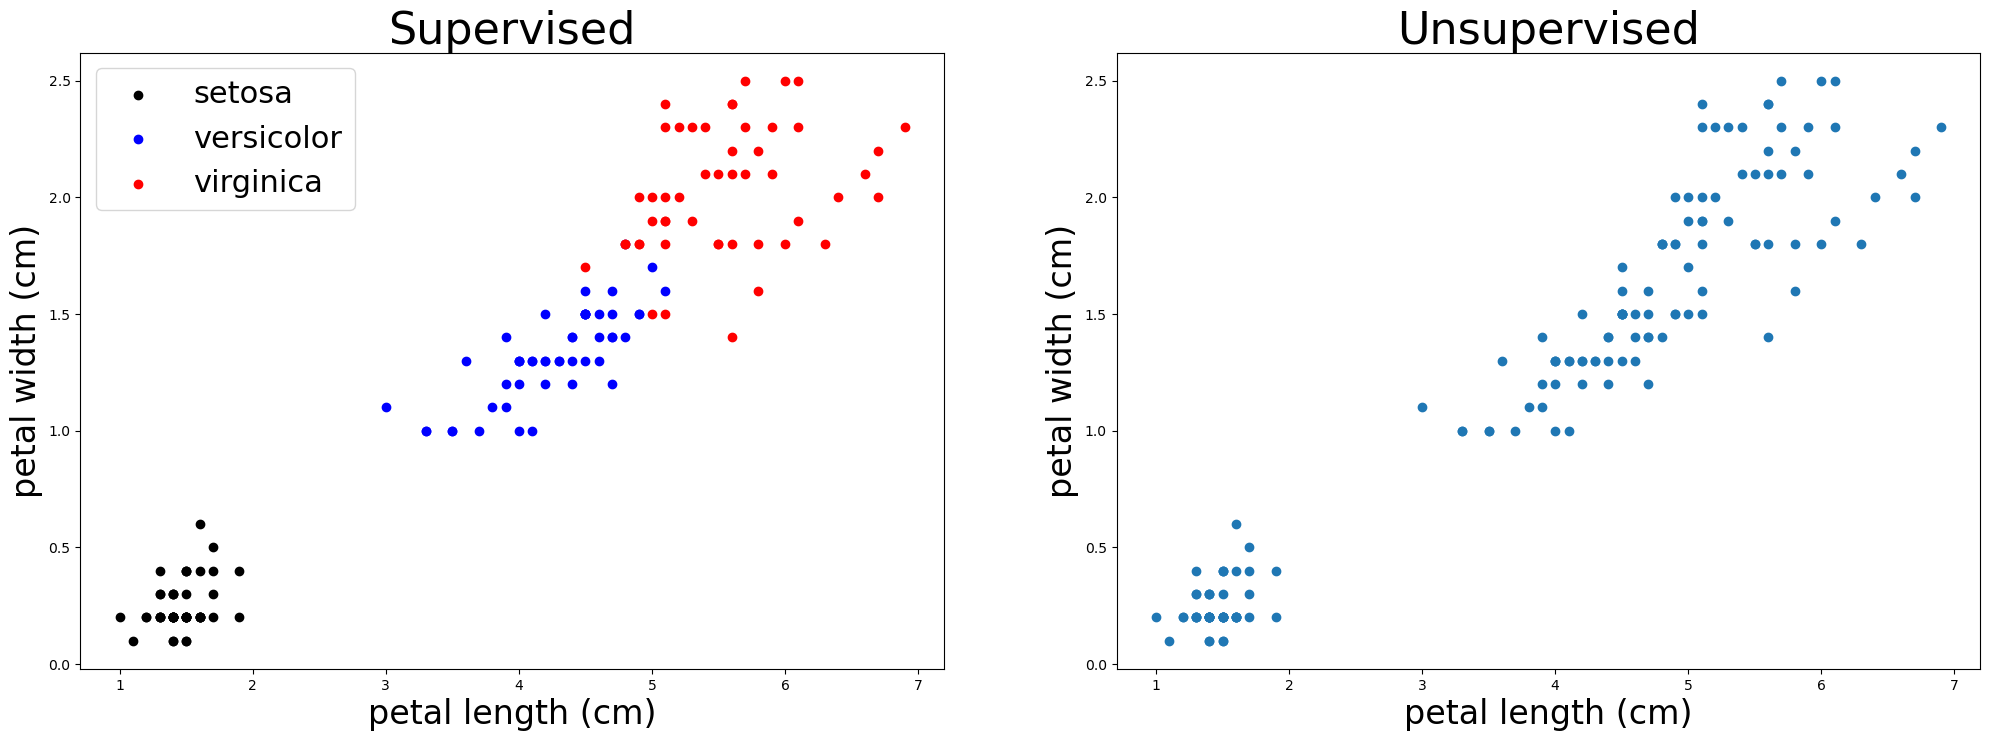

In [9]:
iris_df["target"] = labels
plot_sup_x_unsup(iris_df, 8, 8)

- In case of supervised learning, we're given $X$ and $y$ (showed with different colours in the plot above). 
- In case of unsupervised learning, we're only given $X$ and the goal is to identify the underlying structure in data.  

## Unsupervised learning applications

### Example 1: Customer segmentation

- Understand landscape of the market. 

![](img/customer-segmentation.png)
<!-- <img src="img/customer-segmentation.png" alt="" height="800" width="800">  -->

[source](https://www.youtube.com/watch?v=zPJtDohab-g&t=134s)

### Example 2: Document clustering 

Grouping articles on different topics from different news sources. For example, [Google News](https://news.google.com). 

![](img/google_news.png)

<!-- <img src="img/google_news.png" alt="" height="1200" width="1200">  -->

### Example 3: Recommender systems

- What should we recommend to the user, so that they buy another product?

![](img/recommendation_system.png)
<!-- <img src="img/recommendation_system.png" alt="" height="1000" width="1000">  -->

#### Example 4: Examples projects from Capstone proposals 

Here are some projects from Capstone proposals which would involve unsupervised learning. 

- Creating (figurative) ecommerce shopping aisles with ML 
- Life Decision Support: Choose your best career path
- ...

- If you want to build a machine learning model to cluster such images how would you represent such images? 
- Imagine that we also have ratings data of food items and users for a large number of users. Can you exploit the power of community to recommend certain food items to a given user they are likely to consume? 

## Course roadmap

In this course we'll try to answer these questions. In particular, here is the roadmap of the course. 

- Week 1
    - Clustering (How to group unlabeled data?)
- Week 2 and week 3
    - Dimensionality reduction (How to represent the data?)
    - Word embeddings
- Week 4
    - Recommender systems (How to exploit the power of community to recommend relevant products, services, items to customers they are likely to consume?)

## Framework and tools

- `sklearn`
- `PyTorch`

I will be using `matplotlib`, `plotly`, `seaborn` for plotting simply because I am not very comfortable with `Altair`. The plotting is mainly for the demonstration of the concepts and you are not expected to learn these libraries for this class. You are free to use the libraries of your choice in labs but encouraged to use `Altair`.     

## Attributions

The material of this course is built on the material developed by amazing instructors who have taught this course before. In particular, many thanks to [Mike Gelbart](https://www.mikegelbart.com/), [Rodolfo Lourenzutti](https://www.stat.ubc.ca/users/rodolfo-lourenzutti), and [Giulio Valentino Dalla Riva](https://www.gvdallariva.net/about/). 